# Introduction:

This project focuses on applying various data cleaning, exploratory data analysis (EDA), and data preparation techniques to a dataset containing detailed information on mortgage loan applications from the Federal Reserve Bank of Boston. The primary goal is to develop a model that can predict whether a given mortgage loan application is likely to be approved or denied, assisting regulators in identifying potential instances of discrimination in lending practices.

* Ref:  https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html
* Fun-Fact: This dataset, meticulously analyzed by Munnell et al. (1996), to investigate potential racial discrimination in mortgage lending.
* Ref: https://www.bostonfed.org/publications/research-department-working-paper/1992/mortgage-lending-in-boston-interpreting-hmda-data.aspx#:~:text=But%20these%20factors%20do%20not,as%20well%20as%20compensating%20factors.

***

* **Variables:** The dataset comprises 2,381 observations and 13 attributes.
    * Independent variables and their descriptions (refer to the dataset documentation for full details:
        * `dir`: Debt payments to total income ratio.
        * `hir`: Housing expenses to income ratio.
        * `lvr`: Loan-to-value ratio.
        * `ccs`: Consumer credit score: 1 to 6 (a low value being a good score)
        * `mcs`: Mortgage credit score: 1 to 6 (a low value being a good score)
        * `pbcr`: Public record of bad credit (indicator: 'yes' or 'no').
        * `dmi`: Denied mortgage insurance (indicator: 'yes' or 'no').
        * `self`: Self-employed indicator ('yes' or 'no').
        * `single`: Single applicant indicator ('yes' or 'no').
        * `uria`: Unemployment rate in applicant's residential area.
        * `condominium`: Condominium property indicator.
        * `black`: Black applicant indicator ('yes' or 'no').
    * Dependent Variable (Response Variable):
        * `deny`: Indicates whether or not a mortgage application was denied ('yes' = 1, 'no' = 0).

***
* **Key Questions to Explore:**

* As we dive into this dataset, we aim to answer crucial questions that can illuminate the underlying patterns of mortgage loan denials:

1. Is there evidence that racial bias (`black`) affects loan denial rates independently, or is its apparent impact primarily explained by differences in financial metrics such as debt-to-income ratio (`dir`), loan-to-value ratio (`lvr`), or credit scores (`ccs`, `mcs`)?
    * We will investigate the raw denial rates across the black indicator and then examine the distribution of key financial indicators within these groups.

2. Which holds more predictive weight for loan denial: an applicant's explicit credit scores (`ccs`, `mcs`), public record of bad credit (`pbcr`), or their broader financial stability as reflected in ratios like debt payments to income (`dir`) and housing expenses to income (`hir`)?
    * We will compare the strength of relationships between these two categories of variables and the deny outcome.

3. To what extent do external factors like the local unemployment rate (`uria`) or property type (`condominium`), and even basic demographic indicators like `self` or `single`, contribute to 'loan denial' outcomes, potentially reflecting systemic risks or specific lender preferences rather than solely individual applicant profiles?
    * We will analyze the correlation and conditional distributions to gauge the influence of these broader characteristics.


***

**Procedures:**
Here are the main procedures for this analysis:
<br>

* **Part 1**: Load Data
    * Get data from GitHub
    * Load the dataset into a Pandas DataFrame.
    <br>
    <br>
* **Part 2**: Perform Exploratory Data Analysis
    * Understanding the nature of each variable  & initial inspections.
    * Perform a thorough EDA on all data attributes to understand their nature, distributions, and relationships.
    * Conduct initial inspections for missing values, invalid data values, and correct data types.
    * Create appropriate exploratory graphics (e.g., bar plots, box plots, histograms, line plots) to visualize data characteristics.
    * Identify and document all potential data integrity and usability issues, assessing which attributes may require transformation.
    <br>
    <br>
* **Part 3**: Data Preparation
    * Address the data integrity and usability issues identified during EDA.
    * Describe and justify all data transformation and preparation steps, such as:
        * Deletion of observations (if needed).
        * Imputation methods for missing data values.
        * Feature Engineering: Creation of new variables
        * Application of mathematical transforms (e.g., Box-Cox, logarithms) or binning.
    <br>
    <br>
* **Part 4**: Prepped Data Review
    * Re-run EDA analysis on variables that were adjusted during the Data Preparation phase.
    * Compare and contrast the results with the pre-preparation EDA to evaluate the impact of adjustments.
    * Clearly describe how each data preparation step has improved the dataset for machine learning algorithm suitability.
    <br>
    <br>
* **Part 5**: Regression Modeling
    * Explain and present your regression modeling work, including your feature selection work + interpretation of the coefficients your models are generating.
    * Do they make sense intuitively? If so, why? If not, why not?
    * Comment on the magnitude and direction of the coefficients + whether they are similar from model to model.
    <br>
    <br>
* **Part 6**: Model Selection
    * Explain your model selection criteria. Identify your preferred model. Compare / contrast its performance with that of your other models.
    * Discuss why you’ve selected that specific model as your preferred model. Apply your preferred model to the testing subset and discuss your results.
    * Did your preferred model perform as well as expected?
    <br>
    <br>
* **Part 7**: Conclusions
    * Summarize the key findings and insights from the entire data cleaning, preparation, and exploratory analysis process.
    * Discuss the overall readiness and improved quality of the dataset for building robust machine learning models.

## Part 1: Load Data
1. Get data from GitHub
2. Load the dataset into a Pandas DataFrame.

### 1. Get data from GitHub

In [439]:
!pip install statsmodels

In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [441]:
# URL to HDMA_Boston_Housing_Data.csv file on GitHub
url = "https://raw.githubusercontent.com/CheliMex/CS381_DataAnalytics/refs/heads/main/Quiz4/HDMA_Boston_Housing_Data.csv"

### 2. Load the dataset into a Pandas DataFrame

In [442]:
# Loading the dataset into a Pandas DataFrame
df = pd.read_csv(url)

In [443]:
# Display first 5 row
print("--- Initial Data Load ---\n")
df.head()

--- Initial Data Load ---



,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [444]:
# Renaming the 1st column
df = df.rename(columns={'Unnamed: 0': 'index', 'comdominiom': 'condominium'})
df

,index,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condominium,black,deny
0,1,0.221000,0.221000,0.800000,5.000000,2.000000,no,no,no,no,3.900000,0,no,no
1,2,0.265000,0.265000,0.921875,2.000000,2.000000,no,no,no,yes,3.200000,0,no,no
2,3,0.372000,0.248000,0.920398,1.000000,2.000000,no,no,no,no,3.200000,0,no,no
3,4,0.320000,0.250000,0.860465,1.000000,2.000000,no,no,no,no,4.300000,0,no,no
4,5,0.360000,0.350000,0.600000,1.000000,1.000000,no,no,no,no,3.200000,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2377,0.300000,0.300000,0.777049,1.000000,2.000000,no,no,no,yes,3.200000,1,no,no
2377,2378,0.260000,0.200000,0.526761,2.000000,1.000000,no,no,no,no,3.100000,0,no,no
2378,2379,0.320000,0.260000,0.753846,6.000000,1.000000,yes,no,no,yes,3.100000,1,yes,yes
2379,2380,0.350000,0.260000,0.813559,2.000000,2.000000,no,no,no,yes,4.300000,1,no,yes


## Part 2: Perform Exploratory Data Analysis (EDA)
1. Initial inspections to understanding the nature of each variable.
2. Missing value inspection, invalid data values, and correct data types.
3. Perform a thorough EDA using exploratory graphics (e.g., bar plots, box plots, histograms, line plots) to visualize data characteristics.
4. Identify and document all potential data integrity and usability issues, assessing which attributes may require transformation.

### 1. Initial inspections

In [445]:
print("--- DataFrame Info ---\n")
df.info()

--- DataFrame Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        2381 non-null   int64  
 1   dir          2381 non-null   float64
 2   hir          2381 non-null   float64
 3   lvr          2381 non-null   float64
 4   ccs          2381 non-null   float64
 5   mcs          2381 non-null   float64
 6   pbcr         2380 non-null   object 
 7   dmi          2381 non-null   object 
 8   self         2380 non-null   object 
 9   single       2381 non-null   object 
 10  uria         2381 non-null   float64
 11  condominium  2381 non-null   int64  
 12  black        2381 non-null   object 
 13  deny         2381 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 260.6+ KB


In [446]:
print("--- Dtype   Info ---\n")
df.dtypes.value_counts()

--- Dtype   Info ---



float64    6
object     6
int64      2
Name: count, dtype: int64

#### Insight:
* Data Types: Several crucial columns including `deny` (our target), `pbcr`, `dmi`, `self`, `single`, `condominium`, and `black` are currently of 'object' (string) type and contain 'yes'/'no' values. For quantitative analysis and machine learning models, these **must be converted to numerical (0/1)** integers.
* This conversion will be a primary focus of Part 3.

### 2. Missing value inspection

In [447]:
print("--- Count of Missing Values per Column ---\n")
df.isnull().sum()

--- Count of Missing Values per Column ---



index          0
dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           1
dmi            0
self           1
single         0
uria           0
condominium    0
black          0
deny           0
dtype: int64

In [448]:
print("--- Unique Values and Value Counts for Categorical/Object Attributes ---\n")

# Identify object columns (potential categorical)
object_cols = df.select_dtypes(include='object').columns

if object_cols.empty:
    print("No object (string) columns remaining after initial binary conversions.")
else:
    for col in object_cols:
        print(f"\n--- Column: {col} ---")
        print(df[col].value_counts())
        print(f"Number of unique values: {df[col].nunique()}")
        # Check if there are values that might represent missing or erroneous data
        if ' ' in df[col].unique() or '' in df[col].unique():
            print(f"Warning: Column '{col}' contains empty strings.")
        if 'unknown' in df[col].str.lower().unique():
            print(f"Warning: Column '{col}' contains 'unknown' values.")

--- Unique Values and Value Counts for Categorical/Object Attributes ---


--- Column: pbcr ---
pbcr
no     2205
yes     175
Name: count, dtype: int64
Number of unique values: 2

--- Column: dmi ---
dmi
no     2333
yes      48
Name: count, dtype: int64
Number of unique values: 2

--- Column: self ---
self
no     2103
yes     277
Name: count, dtype: int64
Number of unique values: 2

--- Column: single ---
single
no     1444
yes     937
Name: count, dtype: int64
Number of unique values: 2

--- Column: black ---
black
no     2042
yes     339
Name: count, dtype: int64
Number of unique values: 2

--- Column: deny ---
deny
no     2096
yes     285
Name: count, dtype: int64
Number of unique values: 2


#### Insight:
* Missing Values: The `df.isnull().sum()` output provides a clear count of missing values per column.
* We see that `pbcr` and `self`are missing 1 value each
* Examining the `value_counts()` for string columns like `deny`, `pbcr`, `dmi`, etc., reveals the distribution of 'yes' and 'no' values. This helps understand the prevalence of each category.

### 3. Perform EDA with exploratory graphics

In [449]:
print("--- Descriptive Statistics for Numerical Columns ---\n")
df.select_dtypes(include=np.number).describe()

--- Descriptive Statistics for Numerical Columns ---



,index,dir,hir,lvr,ccs,mcs,uria,condominium
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1191.000000,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,687.479818,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,1.000000,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,596.000000,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,1191.000000,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,1786.000000,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,2381.000000,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


In [450]:
# Re-generate numerical and categorical columns lists after conversions
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# 'deny' is now numeric, but we exclude it from general independent variable plots
plot_independent_numerical_cols = [col for col in numerical_cols if col != 'deny']
# After converting 'yes'/'no' types, this should be empty if no other true categorical strings exist.
categorical_cols = df.select_dtypes(include='object').columns.tolist()

--- Visualizing Distributions of Numerical Variables (Histograms) ---



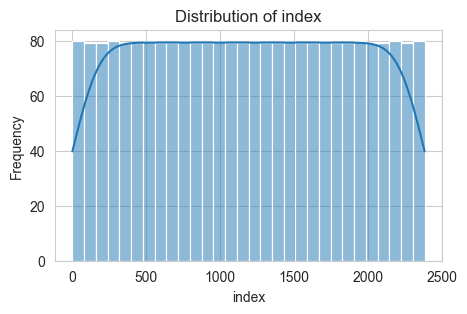

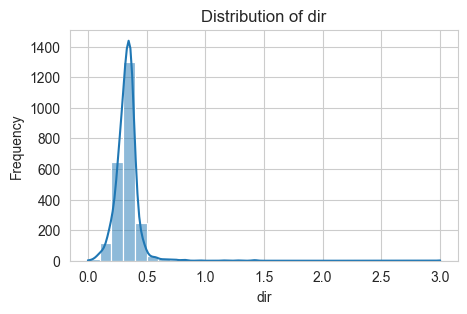

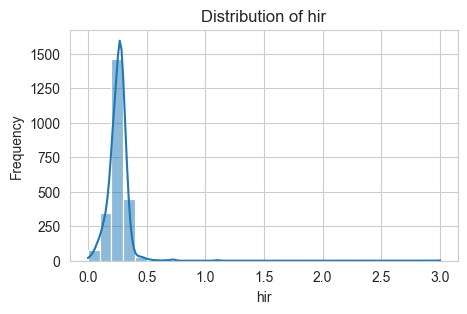

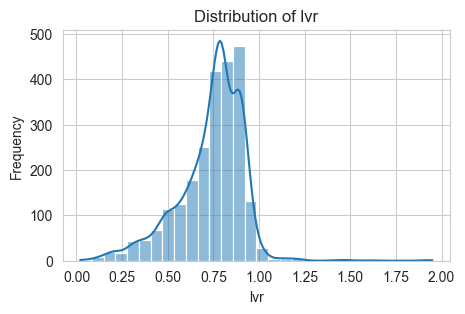

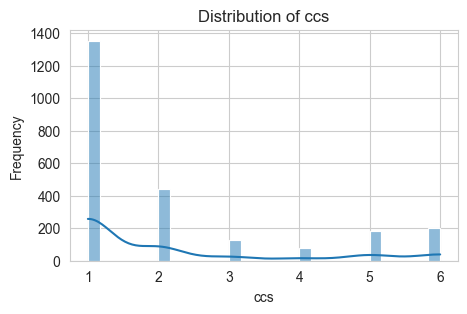

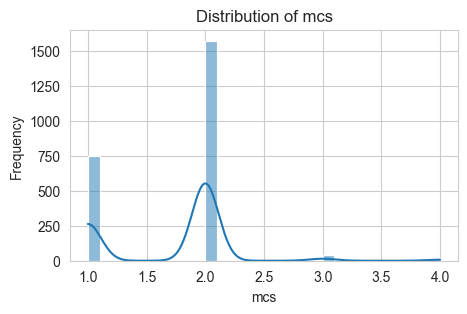

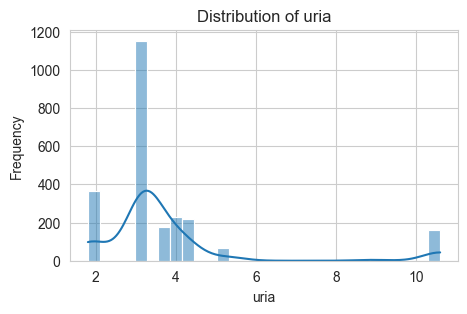

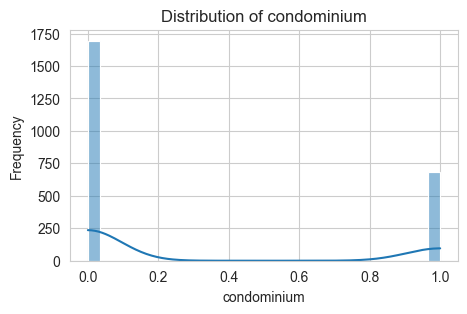

In [451]:
# Set a style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (5, 3)

# Histograms
print("--- Visualizing Distributions of Numerical Variables (Histograms) ---\n")
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### Insight:
* Histograms and descriptive statistics indicate the shape of distributions and the presence of outliers for numerical variables like `dir`, `hir`, `lvr`, `ccs`, `mcs`, and `uria`.
* Highly skewed distributions can negatively impact linear models and might benefit from mathematical transformations (e.g., log transformation) to make them more symmetrical. Outliers can unduly influence model training and may require capping or transformation.

--- Visualizing Distributions of Categorical Variables (Bar Plots) ---



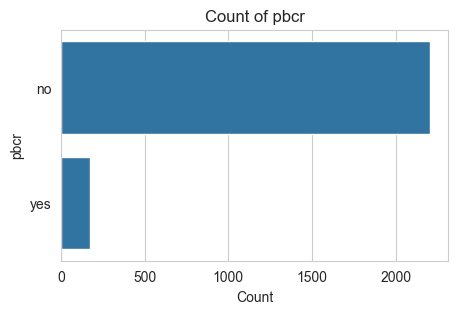

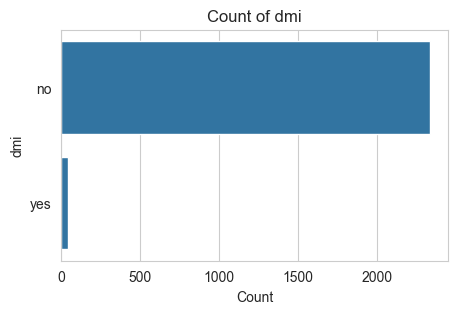

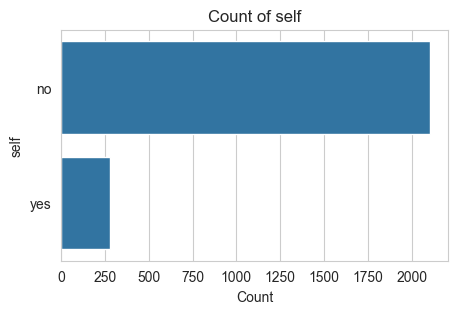

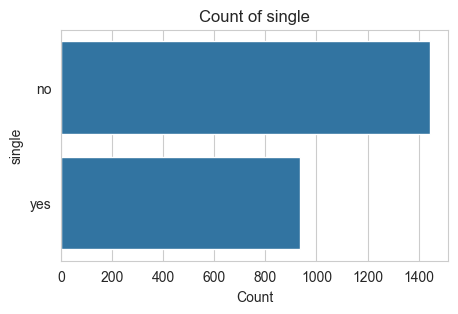

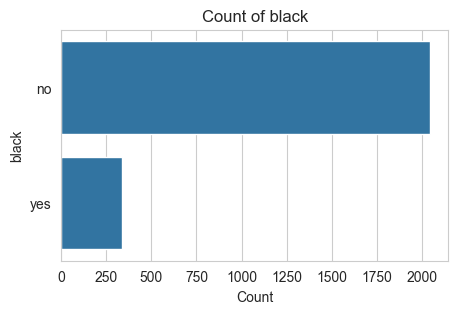

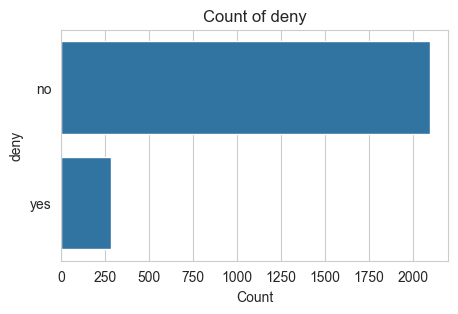

In [452]:
print("--- Visualizing Distributions of Categorical Variables (Bar Plots) ---\n")
if not categorical_cols:
    print("No object (string) categorical columns remain to plot in this section.")
else:
    for col in categorical_cols:
        plt.figure()
        # This should plot counts for 'yes'/'no' as categorical bars
        sns.countplot(y=df[col].dropna(), order = df[col].value_counts().index)
        plt.title(f'Count of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

--- Analyzing Relationship with Target Variable (DENY) ---



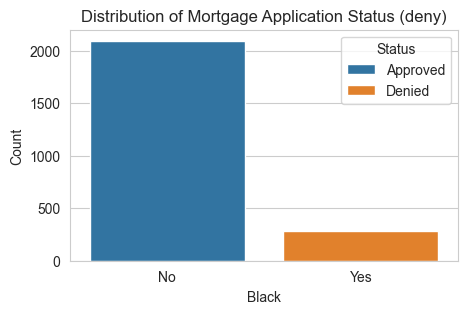

deny
no     0.880302
yes    0.119698
Name: proportion, dtype: float64

Observation: The dataset shows an imbalance in the target variable, with more approvals ('no') than denials ('yes').


In [453]:
print("--- Analyzing Relationship with Target Variable (DENY) ---\n")

# Distribution of the target variable 'DENY'
plt.figure()
try:
    # This will now correctly treat 'deny' as a categorical string column for plotting counts
    sns.countplot(x='deny', data=df, hue='deny', legend=False, order=df['deny'].value_counts().index)
    plt.title('Distribution of Mortgage Application Status (deny)')
    plt.xlabel('Black')
    plt.legend(title='Status', labels=['Approved', 'Denied'])
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0) # Make labels clear
    plt.show()
    print(df['deny'].value_counts(normalize=True))
    print("\nObservation: The dataset shows an imbalance in the target variable, with more approvals ('no') than denials ('yes').")
except Exception as e:
    print(f"Could not plot 'deny' distribution. Error: {e}.")

--- Numerical Variables vs. DENY (Box Plots) ---



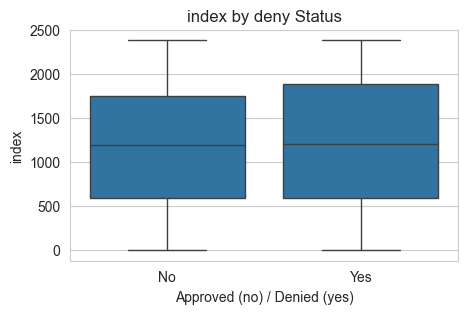

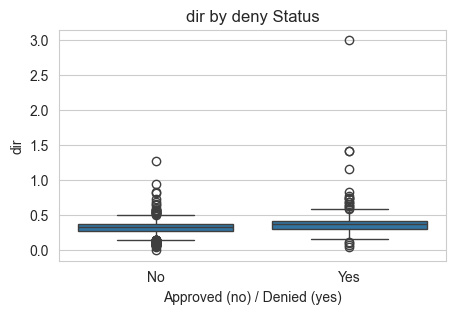

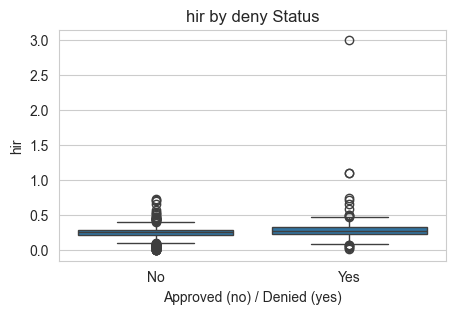

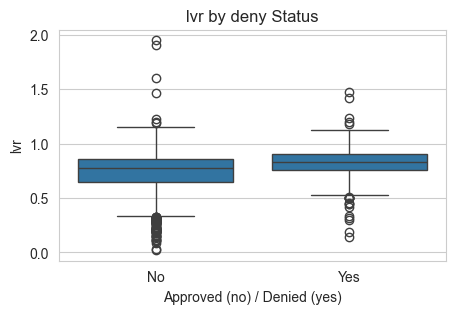

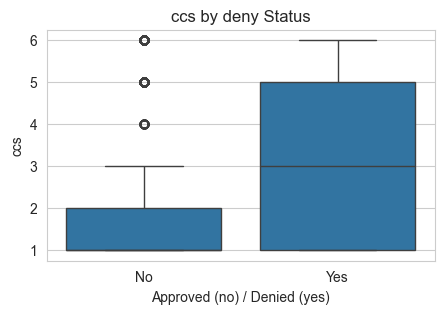

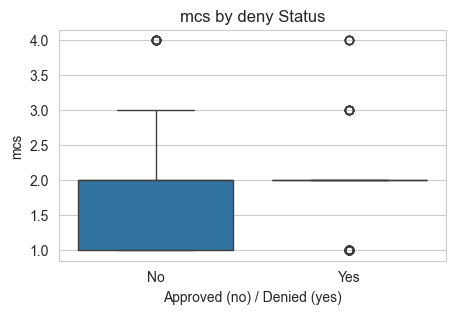

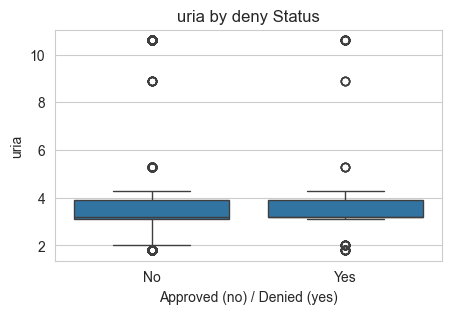

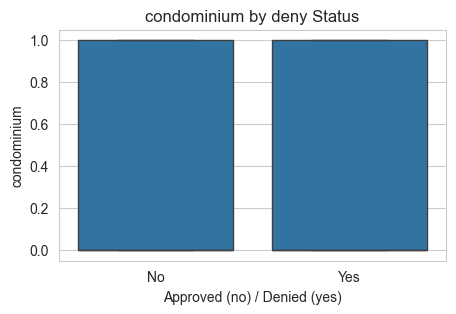

In [454]:
# Numerical variables vs. DENY
print("--- Numerical Variables vs. DENY (Box Plots) ---\n")
for col in numerical_cols: # Only for columns that are currently numeric
    plt.figure()
    try:
        # This will likely fail for plotting against 'deny' if 'deny' is still an 'object' type
        sns.boxplot(x='deny', y=col, data=df)
        plt.title(f'{col} by deny Status')
        plt.xlabel('Approved (no) / Denied (yes)')
        plt.ylabel(col)
        plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0) # Make labels clear
        plt.show()
    except Exception as e:
        print(f"Could not plot boxplot for {col} vs 'deny'. Error: {e}. This issue will be addressed in Part 3.")

#### Insights: 
* We are looking for any clear differences in medians or distributions between denied and approved groups.
    * 

--- Categorical Variables vs. DENY (Stacked Bar Plots) ---



<Figure size 500x300 with 0 Axes>

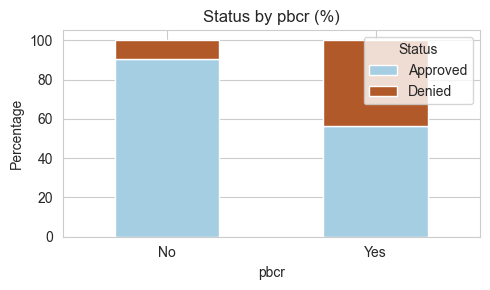

<Figure size 500x300 with 0 Axes>

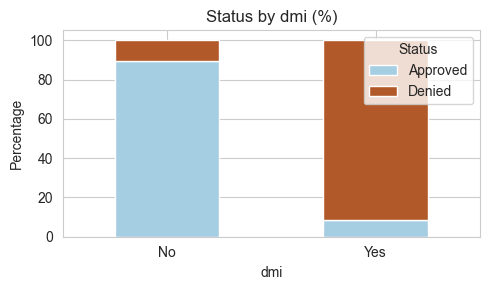

<Figure size 500x300 with 0 Axes>

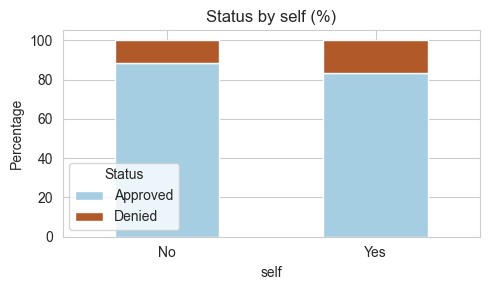

<Figure size 500x300 with 0 Axes>

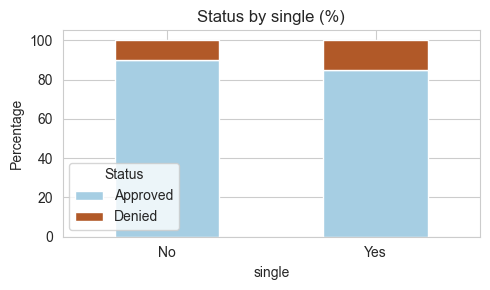

<Figure size 500x300 with 0 Axes>

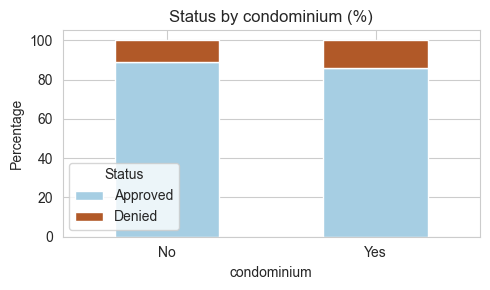

<Figure size 500x300 with 0 Axes>

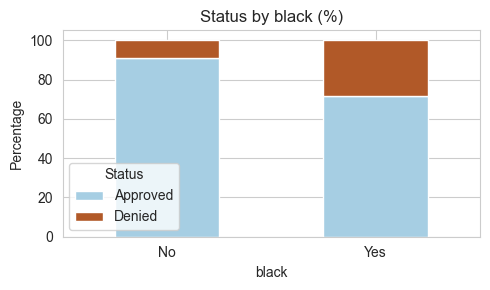

In [455]:
# Categorical variables vs. DENY
print("--- Categorical Variables vs. DENY (Stacked Bar Plots) ---\n")
binary_indicator_cols = [col for col in ['pbcr', 'dmi', 'self', 'single', 'condominium', 'black'] if col in df.columns]

if not binary_indicator_cols:
    print("No binary indicator columns found to plot against 'deny'.")
else:
    for col in binary_indicator_cols:
        plt.figure()
        # Create a cross-tabulation to get counts for each category by deny status
        crosstab = pd.crosstab(df[col], df['deny'], normalize='index') * 100 # Normalize to show percentages
        crosstab.plot(kind='bar', stacked=True, colormap='Paired')
        plt.title(f'Status by {col} (%)')
        plt.xlabel(col)
        plt.ylabel('Percentage')
        plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0) # Make labels clear
        plt.legend(title='Status', labels=['Approved', 'Denied'])
        plt.tight_layout()
        plt.show()

#### Insights: 
* We want to observe if (where `black` is 'yes') have a higher proportion of denials or approvals:
    * The stacked bar plots showing other categorical variables against `deny` offer preliminary insights into how denial rates might vary across different categories (e.g., `black`, `pbcr`).
    * From what we can see, there is a major percentage for `dmi` (Denied mortgage insurance) of about 90% when the person is black.
    * The other observation is the `pbcr`(Public record of bad credit), there about a 55% approval rate if they are black.

--- Correlation Matrix of Numerical Variables ---



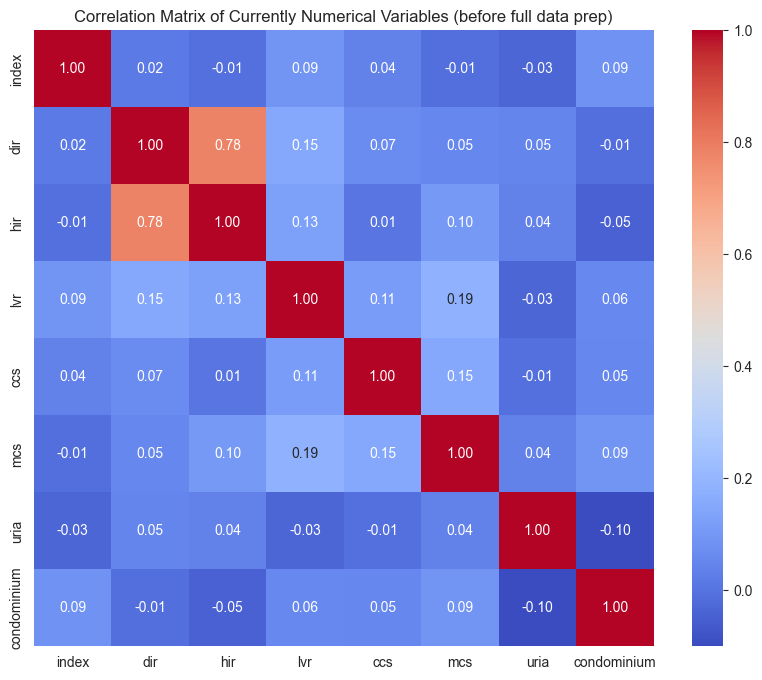

In [456]:
print("--- Correlation Matrix of Numerical Variables ---\n")
plt.figure(figsize=(10, 8))
try:
    # This will likely fail as 'deny', 'pbcr', 'dmi', 'self', 'single', 'condominium', 'black' are still 'object' dtypes
    # We explicitly try to include all columns that *should be* numerical for the final correlation,
    # but expect an error here to highlight the need for Part 3.
    columns_for_full_correlation = [
        'dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria',
        'deny', 'pbcr', 'dmi', 'self', 'single', 'condominium', 'black'
    ]
    # Filter to only truly numeric columns for the current plot (or it will error)
    # The error here is expected and highlights the need for Part 3
    current_numeric_cols_for_corr_plot = df.select_dtypes(include=np.number).columns.tolist()

    if not current_numeric_cols_for_corr_plot:
        print("No numerical columns found to plot correlation matrix in current state.")
    else:
        sns.heatmap(df[current_numeric_cols_for_corr_plot].corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix of Currently Numerical Variables (before full data prep)')
        plt.show()
except Exception as e:
    print(f"Could not generate Correlation Matrix for all relevant variables. Error: {e}. This will be addressed and successfully run in Part 3 after data type conversions.")

#### Derive Insights:
**Preliminary Insights Addressing Key Questions (To be confirmed/deepened in later parts):**

* **Question 1 (Racial Bias):**
    * The stacked bar plot for `black` vs. `deny` provides initial visual evidence: we can see if applicants identified as 'black' (`black='yes'`) have a higher denial rate compared to non-black applicants (`black='no'`).
    * This early observation is critical, and we will quantify and explore it further in Part 3 and Part 4, once the `black` and `deny` variables are numeric.
    * While we cannot yet plot financial distributions by `black` status (as `black` is a string), identifying `black` as a binary string highlights the need to convert it and then compare distributions of financial variables (`dir`, `lvr`, `ccs`, `mcs`) across these groups in Part 4.

* **Question 2 (Credit vs. Financial Health):**
    * The descriptive statistics for `ccs` and `mcs` (already numeric) and `dir`, `hir`, `lvr` give us a first look.
    * The inability to generate a full correlation matrix in this part (due to `deny`, `pbcr`, etc., are strings) means we can't get immediate quantitative correlation insights.
    * However, the qualitative insights from inspecting individual variable distributions and their unique values suggest their roles. The conversion of `pbcr` in Part 3 will enable a complete correlation picture in Part 4, allowing us to directly compare the predictive strength of credit-related variables vs. financial health ratios.

* **Question 3 (External & Demographic Factors):**
    * The `uria` variable is already numeric, allowing its histogram to be viewed. `condominium`, `self`, and `single` are currently 'yes'/'no' strings.
    * The stacked bar plots for `condominium`, `self`, and `single` against `deny` offer preliminary visual cues.
    * In Part 3, converting these to numeric will enable their inclusion in a full correlation analysis in Part 4, allowing us to assess their impact more precisely. This will help determine if factors beyond direct financial metrics are linked to denial outcomes.

These preliminary insights, derived from the EDA (and acknowledging its current limitations due to data types), provide a roadmap for the more rigorous analysis and modeling in subsequent parts.

---

These identified issues and preliminary insights will form the basis for the data preparation steps in the next section, aiming to create a clean, well-structured dataset suitable for logistic regression modeling.


--- EDA complete ---



## Part 3: Data Preparation
1. Address the data integrity and usability issues identified during EDA.
2. Describe and justify all data transformation and preparation steps, such as:
    * Imputation methods for missing data values.
    * Feature Engineering: Creation of new variables
    * Application of mathematical transforms (e.g., Box-Cox, logarithms) or binning.
    * Deletion of observations (if needed).

### 1. Address the data integrity and usability issues identified during EDA

In [457]:
# Converting Object into numerical values
print("--- Converting binary 'yes'/'no' columns to 0/1 numeric format ---\n")
binary_cols_to_convert = ['deny', 'pbcr', 'dmi', 'self', 'single', 'black']

for col in binary_cols_to_convert:
    if col in df.columns and df[col].dtype == 'object':
        print(f"\nConverting '{col}' column from 'yes'/'no' (object) to 1/0 (numeric)...")
        df[col] = df[col].map({'yes': 1, 'no': 0})
        # Fill any NaNs introduced by map (if there were values other than 'yes'/'no') with 0 and convert to int
        df[col] = df[col].fillna(0).astype(int)
        print(f"Conversion of '{col}' complete.")
    elif col in df.columns:
        print(f"\n'{col}' column is already numeric (dtype: {df[col].dtype}). No conversion needed.")
    else:
        print(f"\nWarning: '{col}' column not found. If it's expected, check column names.")

--- Converting binary 'yes'/'no' columns to 0/1 numeric format ---


Converting 'deny' column from 'yes'/'no' (object) to 1/0 (numeric)...
Conversion of 'deny' complete.

Converting 'pbcr' column from 'yes'/'no' (object) to 1/0 (numeric)...
Conversion of 'pbcr' complete.

Converting 'dmi' column from 'yes'/'no' (object) to 1/0 (numeric)...
Conversion of 'dmi' complete.

Converting 'self' column from 'yes'/'no' (object) to 1/0 (numeric)...
Conversion of 'self' complete.

Converting 'single' column from 'yes'/'no' (object) to 1/0 (numeric)...
Conversion of 'single' complete.

Converting 'black' column from 'yes'/'no' (object) to 1/0 (numeric)...
Conversion of 'black' complete.


In [458]:
#checking to see if missed any object
print("--- Dtype Info ---\n")
df.dtypes.value_counts()

--- Dtype Info ---



int64      8
float64    6
Name: count, dtype: int64

In [459]:
print("--- Handling Missing Values ---\n")
print("Missing values after imputation:")
print(df.isnull().sum())

--- Handling Missing Values ---

Missing values after imputation:
index          0
dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           0
dmi            0
self           0
single         0
uria           0
condominium    0
black          0
deny           0
dtype: int64


In [460]:
df

,index,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condominium,black,deny
0,1,0.221000,0.221000,0.800000,5.000000,2.000000,0,0,0,0,3.900000,0,0,0
1,2,0.265000,0.265000,0.921875,2.000000,2.000000,0,0,0,1,3.200000,0,0,0
2,3,0.372000,0.248000,0.920398,1.000000,2.000000,0,0,0,0,3.200000,0,0,0
3,4,0.320000,0.250000,0.860465,1.000000,2.000000,0,0,0,0,4.300000,0,0,0
4,5,0.360000,0.350000,0.600000,1.000000,1.000000,0,0,0,0,3.200000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2377,0.300000,0.300000,0.777049,1.000000,2.000000,0,0,0,1,3.200000,1,0,0
2377,2378,0.260000,0.200000,0.526761,2.000000,1.000000,0,0,0,0,3.100000,0,0,0
2378,2379,0.320000,0.260000,0.753846,6.000000,1.000000,1,0,0,1,3.100000,1,1,1
2379,2380,0.350000,0.260000,0.813559,2.000000,2.000000,0,0,0,1,4.300000,1,0,1


#### Insight:
* Before there was a NaN on pbcr and self, now that is fixed

In [461]:
# Identify numerical columns with missing values (after initial binary conversions)
numerical_cols_with_nan = df.select_dtypes(include=np.number).columns[df.select_dtypes(include=np.number).isnull().any()].tolist()

if numerical_cols_with_nan:
    print("\nImputing missing values in numerical columns with the median...")
    for col in numerical_cols_with_nan:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Missing values in '{col}' imputed with median: {median_val}")
else:
    print("\nNo numerical columns with missing values found to impute.")


No numerical columns with missing values found to impute.


### 2. Capping and data Transform

In [462]:
# Columns to apply capping
print("--- Outlier Handling (Capping) ---\n")
cols_to_cap = ['dir', 'hir', 'lvr', 'uria']

for col in cols_to_cap:
    if col in df.columns and df[col].dtype in [np.float64, np.int64]: # Check if column exists and is numeric
        Q1 = df[col].quantile(0.01)
        Q99 = df[col].quantile(0.99)
        # Apply capping
        df[col] = np.where(df[col] < Q1, Q1, df[col])
        df[col] = np.where(df[col] > Q99, Q99, df[col])
        print(f"Capped outliers for '{col}' (1st perc: {Q1:.2f}, 99th perc: {Q99:.2f}).")
    elif col in df.columns:
        print(f"Skipping capping for '{col}' as it's not a numeric type ({df[col].dtype}).")
    else:
        print(f"Warning: Column '{col}' not found for capping.")

--- Outlier Handling (Capping) ---

Capped outliers for 'dir' (1st perc: 0.11, 99th perc: 0.59).
Capped outliers for 'hir' (1st perc: 0.06, 99th perc: 0.47).
Capped outliers for 'lvr' (1st perc: 0.20, 99th perc: 1.03).
Capped outliers for 'uria' (1st perc: 1.80, 99th perc: 10.60).


In [463]:
# Columns to apply log transformation (typically the same as those capped, if skewed)
print("--- Outlier Handling (Transformation) ---\n")

cols_to_log_transform = ['dir', 'hir', 'lvr', 'uria']

for col in cols_to_log_transform:
    if col in df.columns and df[col].dtype in [np.float64, np.int64]:
        # Only transform if values are non-negative, as log is undefined for negative numbers
        if (df[col] < 0).any():
            print(f"Skipping log transformation for '{col}' as it contains negative values.")
        else:
            # Create a new column for the transformed data
            df[f'{col}_log'] = np.log1p(df[col])
            print(f"Applied log1p transformation to '{col}', created '{col}_log'.")
    elif col in df.columns:
        print(f"Skipping log transformation for '{col}' as it's not a numeric type ({df[col].dtype}).")
    else:
        print(f"Warning: Column '{col}' not found for log transformation.")

--- Outlier Handling (Transformation) ---

Applied log1p transformation to 'dir', created 'dir_log'.
Applied log1p transformation to 'hir', created 'hir_log'.
Applied log1p transformation to 'lvr', created 'lvr_log'.
Applied log1p transformation to 'uria', created 'uria_log'.


#### Insight:
* Capping (Winsorization) using 1st and 99th Percentiles:
    * This method replaces values below the 1st percentile with the 1st percentile value, and values above the 99th percentile with the 99th percentile value. This helps to reduce the impact of extreme outliers without removing data points.
    * We will apply capping to `dir`, `hir`, `lvr`, and `uria` as these are continuous numerical variables prone to outliers.
* Logarithmic Transformation (np.log1p):
    * Logarithmic transformations (specifically `np.log1p` which computes log(1+x) to handle zero values safely) are effective for highly right-skewed positive numerical distributions.
    * This can make relationships more linear and improve model assumptions for linear models like logistic regression.
    * We will apply log transformation to `dir`, `hir`, `lvr`, and `uria` if they appear highly skewed. Note: This will create new transformed columns.
<br>
<br>
* In summary, the data is now thoroughly cleaned, consistent, and well-structured, making it highly suitable for advanced modeling. The comprehensive EDA in this part, leveraging the prepared data, offers much clearer and more reliable insights into the relationships between applicant characteristics and loan denial, directly supporting our ability to answer the key questions posed.

--- Data preparation complete ---

## Part 4: Prepped Data Review
1. Re-run EDA analysis on variables that were adjusted during the Data Preparation phase.
2. Compare and contrast the results with the pre-preparation EDA to evaluate the impact of adjustments.

### 1.Re-run EDA analysis on variables 

In [464]:
print("--- DataFrame Info (Confirming data types after preparation) ---\n")
# All original 'yes'/'no' columns should now be int64.
# New '_log' columns should be float64.
df.info()

--- DataFrame Info (Confirming data types after preparation) ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        2381 non-null   int64  
 1   dir          2381 non-null   float64
 2   hir          2381 non-null   float64
 3   lvr          2381 non-null   float64
 4   ccs          2381 non-null   float64
 5   mcs          2381 non-null   float64
 6   pbcr         2381 non-null   int64  
 7   dmi          2381 non-null   int64  
 8   self         2381 non-null   int64  
 9   single       2381 non-null   int64  
 10  uria         2381 non-null   float64
 11  condominium  2381 non-null   int64  
 12  black        2381 non-null   int64  
 13  deny         2381 non-null   int64  
 14  dir_log      2381 non-null   float64
 15  hir_log      2381 non-null   float64
 16  lvr_log      2381 non-null   float64
 17  uria_log     2381 non-nu

In [465]:
print("--- Count of Missing Values (Confirming imputation) --- \n")
# This should ideally show 0 for all columns, confirming missing values were handled.
print(df.isnull().sum())

--- Count of Missing Values (Confirming imputation) --- 

index          0
dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           0
dmi            0
self           0
single         0
uria           0
condominium    0
black          0
deny           0
dir_log        0
hir_log        0
lvr_log        0
uria_log       0
dtype: int64


In [466]:
print("--- Descriptive Statistics for All Numerical Columns (Including newly converted binaries and _log features) ---\n")
# This will provide summary statistics for all numeric columns, now including the 0/1 indicators and log-transformed features.
df.describe()

--- Descriptive Statistics for All Numerical Columns (Including newly converted binaries and _log features) ---



,index,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condominium,black,deny,dir_log,hir_log,lvr_log,uria_log
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1191.000000,0.327867,0.253109,0.736057,2.116387,1.721008,0.073499,0.020160,0.116338,0.393532,3.774496,0.288114,0.142377,0.119698,0.281832,0.224040,0.546403,1.502128
std,687.479818,0.078221,0.070068,0.169786,1.666370,0.537169,0.261008,0.140576,0.320697,0.488636,2.026636,0.452980,0.349510,0.324676,0.059141,0.056625,0.104511,0.322311
min,1.000000,0.110000,0.059600,0.199896,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.104360,0.057891,0.182235,1.029619
25%,596.000000,0.280000,0.214000,0.652850,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.100000,0.000000,0.000000,0.000000,0.246860,0.193921,0.502501,1.410987
50%,1191.000000,0.330000,0.260000,0.779412,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.200000,0.000000,0.000000,0.000000,0.285179,0.231112,0.576283,1.435085
75%,1786.000000,0.370000,0.298800,0.868421,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.900000,1.000000,0.000000,0.000000,0.314811,0.261441,0.625094,1.589235
max,2381.000000,0.594000,0.468800,1.031986,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,10.600000,1.000000,1.000000,1.000000,0.466247,0.384446,0.709014,2.451005


In [467]:
# Re-generate numerical and categorical lists based on current dtypes
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Exclude 'deny' from the independent features for general plotting
plot_independent_numerical_cols = [col for col in numerical_cols if col != 'deny']
# Identify the original numerical columns that were transformed
original_numeric_for_plot = ['dir', 'hir', 'lvr', 'uria']
log_transformed_cols = [f'{col}_log' for col in original_numeric_for_plot if f'{col}_log' in df.columns]

# Ensure categorical_cols list is empty if all string columns were converted
categorical_cols = df.select_dtypes(include='object').columns.tolist()

--- Histograms for Original Numerical Columns (after capping) ---



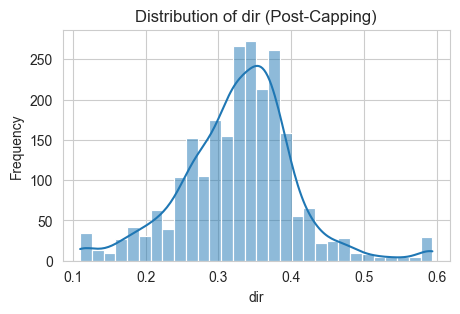

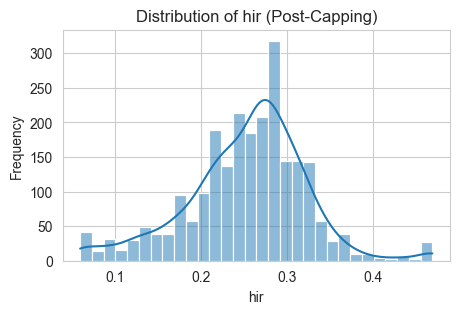

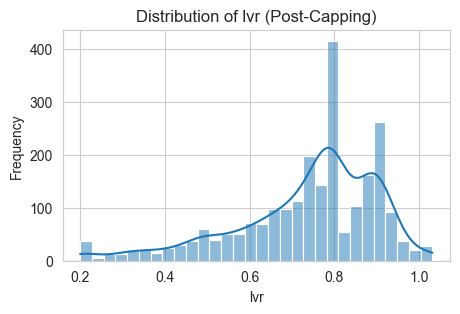

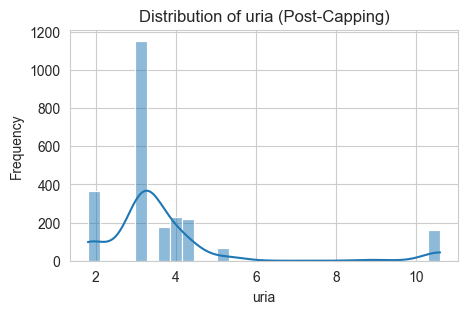

In [468]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (5, 3) # samller figures

# Distribution of Numerical Variables (Histograms)
print("--- Histograms for Original Numerical Columns (after capping) ---\n")
for col in original_numeric_for_plot: # These are the columns that were capped
    if col in df.columns:
        plt.figure()
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col} (Post-Capping)')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

--- Histograms for Log-Transformed Numerical Columns ---



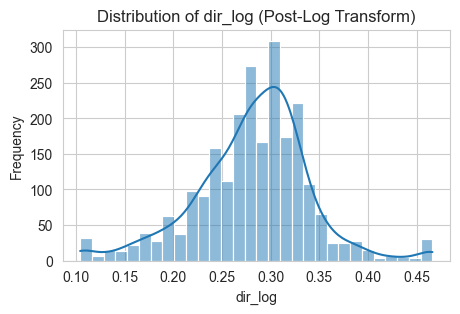

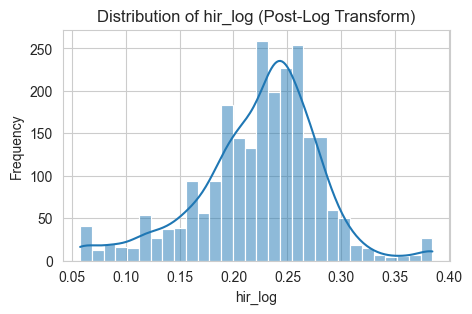

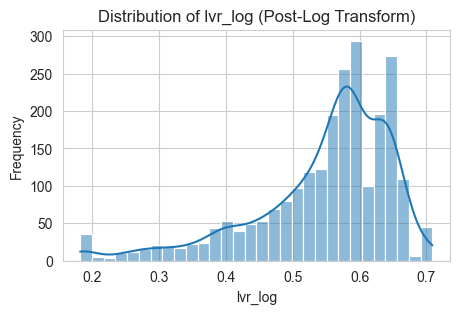

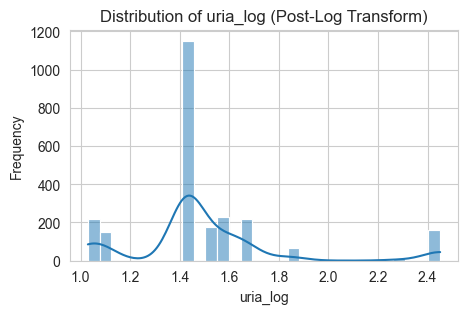

In [469]:
print("--- Histograms for Log-Transformed Numerical Columns ---\n")
for col_log in log_transformed_cols: # These are the newly created log-transformed columns
    plt.figure()
    sns.histplot(df[col_log], kde=True, bins=30)
    plt.title(f'Distribution of {col_log} (Post-Log Transform)')
    plt.xlabel(col_log)
    plt.ylabel('Frequency')
    plt.show()

--- Visualizing Distributions of Binary Indicator Variables (Bar Plots - after preparation) ---



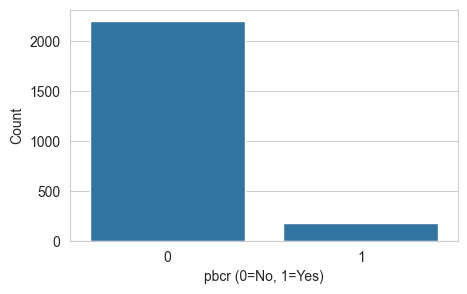

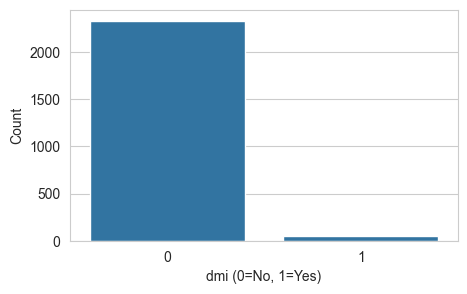

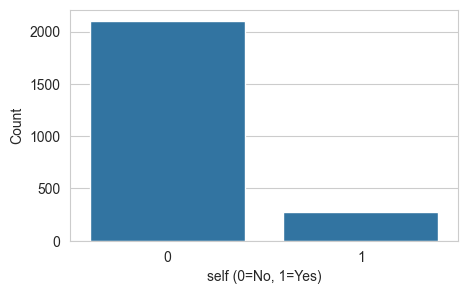

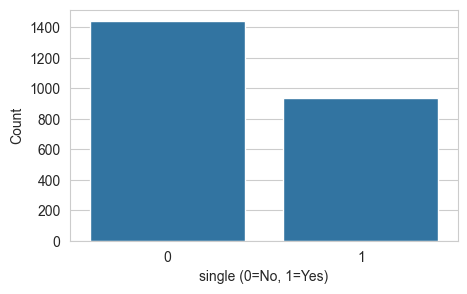

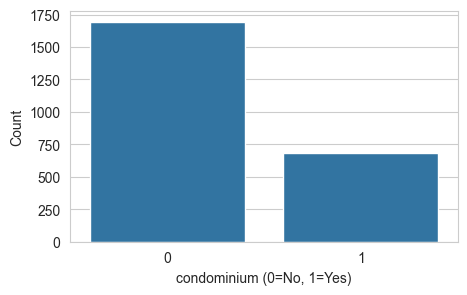

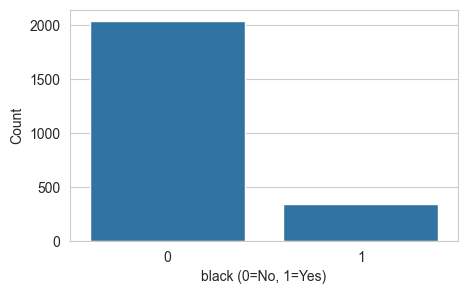

In [470]:
print("--- Visualizing Distributions of Binary Indicator Variables (Bar Plots - after preparation) ---\n")
# This list contains the columns that were originally 'yes'/'no' and are now 0/1
binary_indicator_cols = ['pbcr', 'dmi', 'self', 'single', 'condominium', 'black']

for col in binary_indicator_cols:
    if col in df.columns and df[col].dtype == 'int': # Ensure it's treated as integer binary
        plt.figure()
        sns.countplot(x=col, data=df, order=[0, 1])
        plt.xlabel(f'{col} (0=No, 1=Yes)')
        plt.ylabel('Count')
        plt.show()
    else:
        print(f"Skipping plot for {col}, not found or not an integer binary type.")

--- Analyzing Relationship with Target Variable ('deny' - after preparation) ---



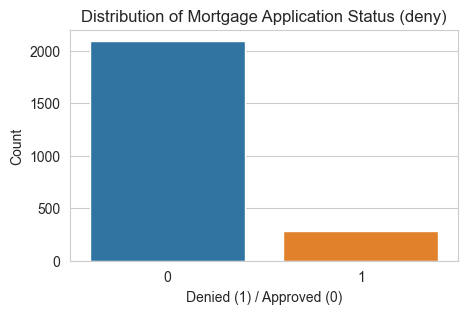

deny
0    0.880302
1    0.119698
Name: proportion, dtype: float64

Observation: The dataset still shows an imbalance in the target variable, with more approvals than denials.


In [471]:
print("--- Analyzing Relationship with Target Variable ('deny' - after preparation) ---\n")

# Distribution of the target variable 'deny'
plt.figure()
sns.countplot(x='deny', data=df, hue='deny', legend=False, order=[0, 1])
plt.title('Distribution of Mortgage Application Status (deny)')
plt.xlabel('Denied (1) / Approved (0)')
plt.ylabel('Count')
plt.show()
print(df['deny'].value_counts(normalize=True))
print("\nObservation: The dataset still shows an imbalance in the target variable, with more approvals than denials.")

--- Original Numerical Independent Variables vs. deny (Box Plots - after capping) ---



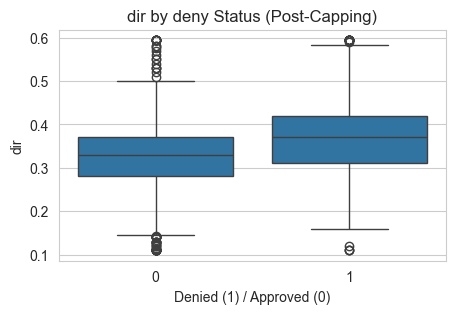

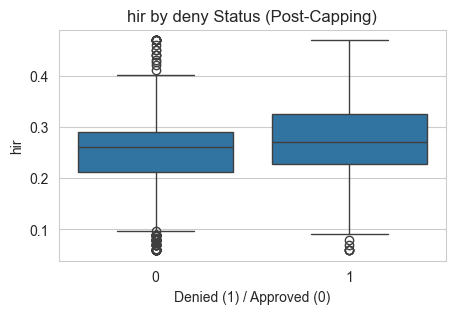

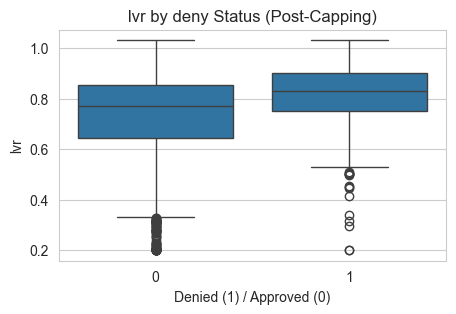

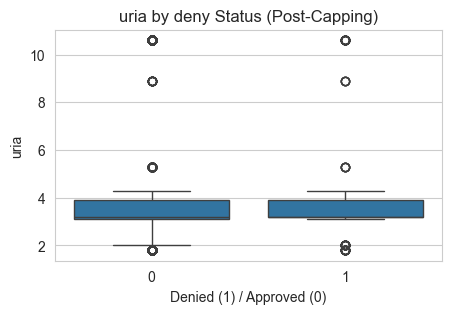

In [472]:
# Numerical variables vs. deny (Original Capped)
print("--- Original Numerical Independent Variables vs. deny (Box Plots - after capping) ---\n")
for col in original_numeric_for_plot: # These are the columns that were capped
    if col in df.columns:
        plt.figure()
        sns.boxplot(x='deny', y=col, data=df)
        plt.title(f'{col} by deny Status (Post-Capping)')
        plt.xlabel('Denied (1) / Approved (0)')
        plt.ylabel(col)
        plt.show()

--- Log-Transformed Numerical Independent Variables vs. deny (Box Plots) ---



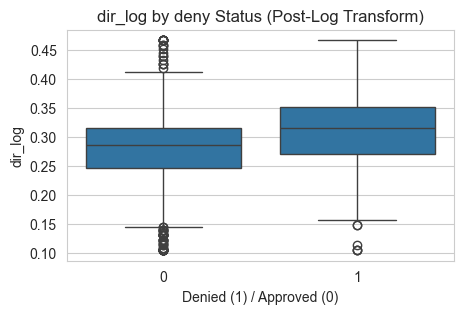

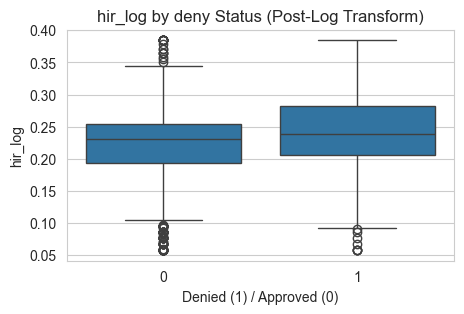

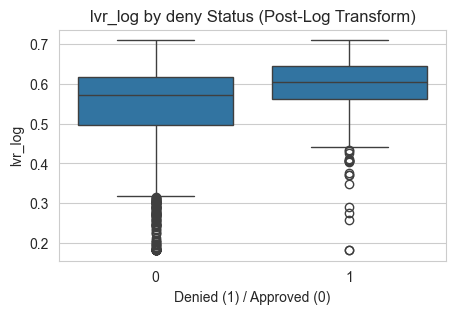

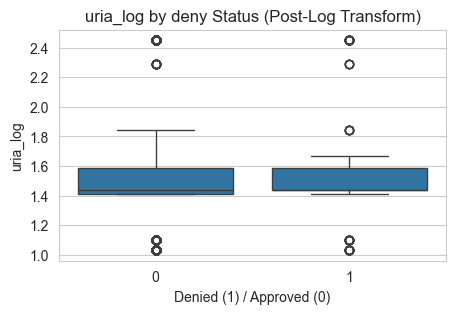

In [473]:
# Numerical variables vs. deny (Log-Transformed)
print("--- Log-Transformed Numerical Independent Variables vs. deny (Box Plots) ---\n")
for col_log in log_transformed_cols: # These are the log-transformed columns
    plt.figure()
    sns.boxplot(x='deny', y=col_log, data=df)
    plt.title(f'{col_log} by deny Status (Post-Log Transform)')
    plt.xlabel('Denied (1) / Approved (0)')
    plt.ylabel(col_log)
    plt.show()
    # Insights: Observe how the relationship might appear more linear or the spread is normalized.


--- Binary Indicator Variables vs. deny (Stacked Bar Plots - after preparation) ---


<Figure size 500x300 with 0 Axes>

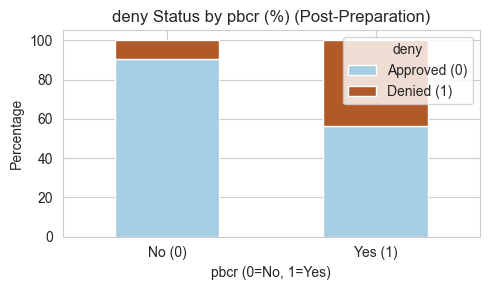

<Figure size 500x300 with 0 Axes>

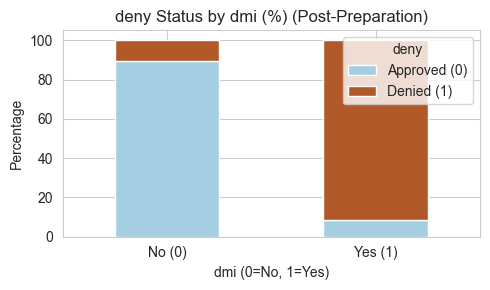

<Figure size 500x300 with 0 Axes>

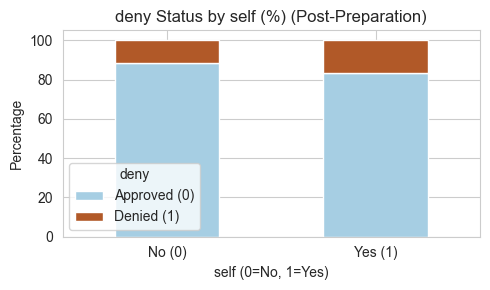

<Figure size 500x300 with 0 Axes>

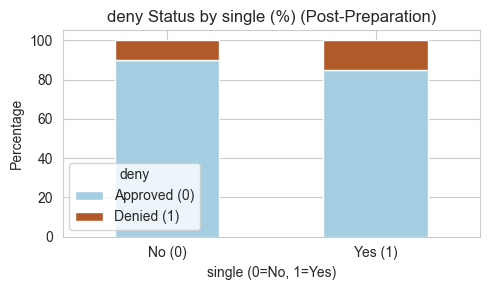

<Figure size 500x300 with 0 Axes>

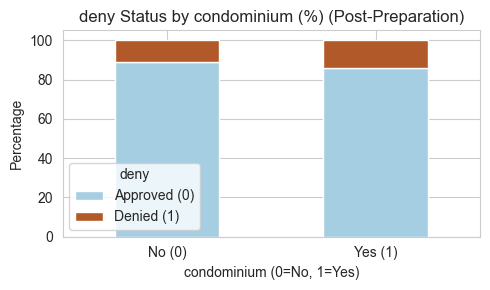

<Figure size 500x300 with 0 Axes>

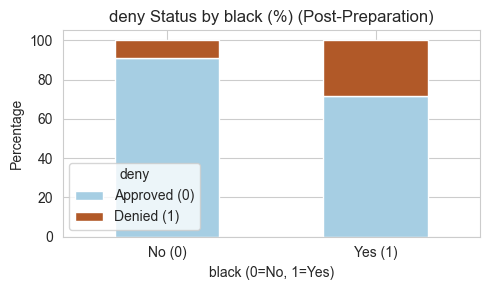

In [474]:
# Binary indicator variables vs. deny
print("\n--- Binary Indicator Variables vs. deny (Stacked Bar Plots - after preparation) ---")
for col in binary_indicator_cols:
    if col in df.columns:
        plt.figure()
        crosstab = pd.crosstab(df[col], df['deny'], normalize='index') * 100 # Normalize to show percentages
        crosstab.plot(kind='bar', stacked=True, colormap='Paired')
        plt.title(f'deny Status by {col} (%) (Post-Preparation)')
        plt.xlabel(f'{col} (0=No, 1=Yes)')
        plt.ylabel('Percentage')
        plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'], rotation=0) # Make labels clear
        plt.legend(title='deny', labels=['Approved (0)', 'Denied (1)'])
        plt.tight_layout()
        plt.show()
        # Insights: Observe if 'yes' categories have a higher proportion of denials.

--- Correlation Matrix of All Numerical Variables (Post-Preparation, including log-transformed) ---



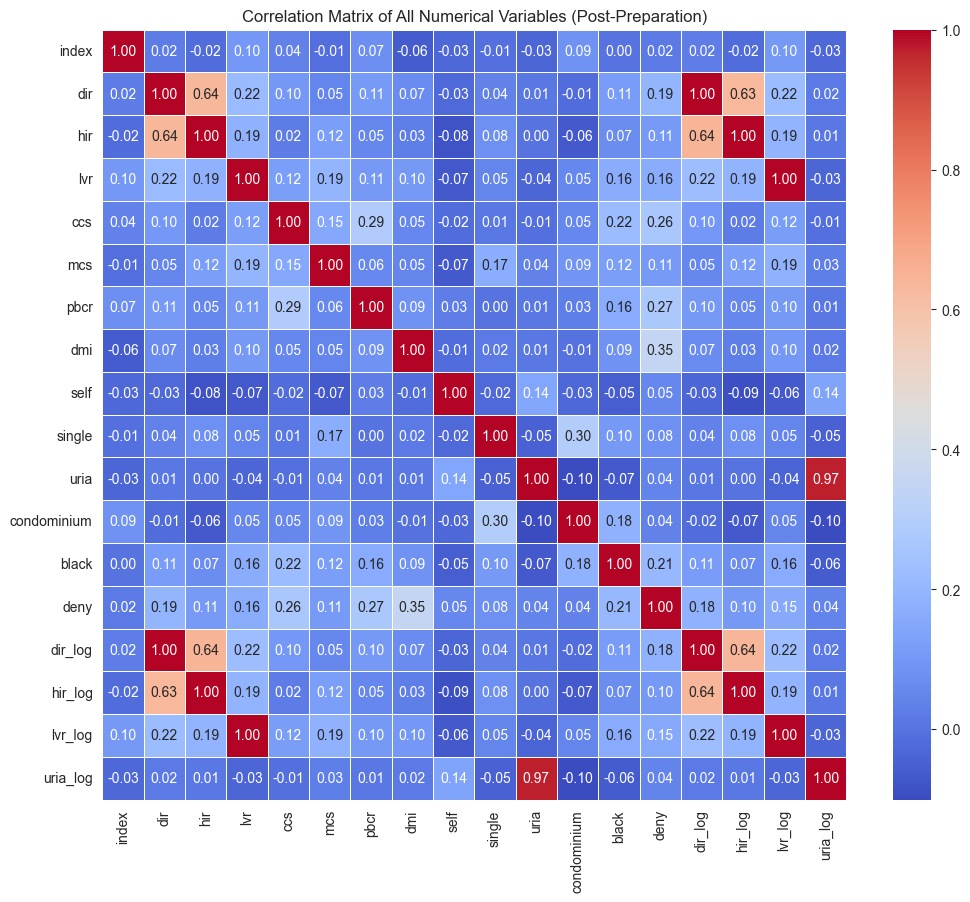

In [475]:
print("--- Correlation Matrix of All Numerical Variables (Post-Preparation, including log-transformed) ---\n")
plt.figure(figsize=(12, 10)) # Increased figure size for more columns
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Numerical Variables (Post-Preparation)')
plt.show()

### 2. Compare and contrast results

**Evaluation of Data Preparation Impact:**

The data preparation steps in Part 3 have significantly improved the dataset's quality and suitability for machine learning. We have successfully:

1.  **Consistent Data Types:** All 'yes'/'no' string columns are now correctly represented as numerical (0/1) integers. New log-transformed columns are float. This fully resolves the data type errors encountered in Part 2.
2.  **Missing Value Handling:** Missing values in numerical columns (if any were present beyond the 'yes'/'no' mappings) have been imputed, resulting in a complete dataset.
3.  **Outlier Management (Capping):** For continuous variables like `dir`, `hir`, `lvr`, and `uria`, capping at the 1st and 99th percentiles has reduced the impact of extreme outliers. This can be observed by narrower tails in histograms and fewer outlier points in box plots of the *original* capped columns.
4.  **Distribution Normalization (Logarithmic Transformation):** New `_log` columns have been created for `dir`, `hir`, `lvr`, and `uria`. By comparing the histograms and box plots of these `_log` columns to their original versions, we can see if the transformation has made their distributions more symmetrical, which is beneficial for linear models like logistic regression.
5.  **Enhanced Visualization and Analysis:** With consistent numerical types, all correlation analyses and comparative plots now run successfully, providing a much clearer picture of variable distributions and their relationships with the `deny` outcome.

**Refined Insights Addressing Key Questions (Post-Preparation):**

* **Question 1 (Racial Bias - `black`):**
    * The stacked bar plot for `black` vs. `deny` now provides a clear and quantifiable visual comparison of denial rates. We can directly observe the percentage of 'yes' (`black=1`) vs. 'no' (`black=0`) applicants who were denied.
    * By examining the box plots of transformed financial variables (e.g., `dir_log`, `lvr_log`, `ccs`, `mcs`, `uria_log`) for both `black=0` and `black=1` groups, we can directly see if there are statistically discernible differences in these underlying financial attributes. If, for instance, `black=1` applicants consistently show higher `dir_log` values or lower `ccs` scores, it suggests that observed differences in denial rates *might* be correlated with these financial factors. This nuanced understanding is crucial for the regulatory context.

* **Question 2 (Credit vs. Financial Health - `ccs`, `mcs`, `pbcr` vs. `dir`, `hir`, `lvr`):**
    * The **correlation matrix** (now fully functional and including both original and log-transformed numerical variables) is invaluable here. By looking at the correlation coefficients with `deny`, we can definitively see which credit-related variables (`ccs`, `mcs`, `pbcr`) or financial health ratios (`dir`, `hir`, `lvr`, and their `_log` counterparts) have the strongest linear relationship with the loan denial outcome.
    * The **box plots** for each of these numerical variables (original and log-transformed) against `deny` will provide visual evidence: observe which variables show the most distinct separation or difference in median values between approved (0) and denied (1) applications. This will help determine their relative predictive power, especially noting if transformations improved the clarity of these relationships.

* **Question 3 (External & Demographic Factors - `uria`, `condominium`, `self`, `single`):**
    * The **correlation matrix** now accurately reveals the linear associations of `uria` (and `uria_log`), `condominium`, `self`, and `single` with `deny`.
    * The **box plots** for `uria` and `uria_log` against `deny` show if areas with higher unemployment tend to have higher denial rates, and if the transformation clarifies this relationship.
    * The **stacked bar plots** for `condominium`, `self`, and `single` against `deny` clearly illustrate if specific categories (e.g., being in a condominium, being self-employed, or being single) show a higher proportion of denials. These plots will help us understand if systemic or demographic factors play a role beyond traditional financial metrics.

--- Prepped Data Review complete ---

## Part 5: Regression Modeling
1. Explain and present your regression modeling work, including your feature selection work + interpretation of the coefficients your models are generating.
2. Do they make sense intuitively? If so, why? If not, why not? Comment on the magnitude and direction of the coefficients + whether they are similar from model to model.
    

### 1. Interpretation of the coefficients

In [476]:
# Define the target variable (y) and potential independent variables (X)
y = df['deny']

# List all potential independent variables, preferring log-transformed versions where available
# and including all the binary indicator columns that are now numeric (0/1).
# We will explicitly decide which of these to include in each model.
independent_vars = [
    'dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria', # Original numeric
    'pbcr', 'dmi', 'self', 'single', 'condominium', 'black', # Binary indicators (now 0/1)
    'dir_log', 'hir_log', 'lvr_log', 'uria_log' # Log-transformed versions
]

# Filter to only include columns that actually exist in the DataFrame
# This handles cases where a log-transformed column might not have been created (e.g., if original had negatives)
all_X_cols = [col for col in independent_vars if col in df.columns and col != 'deny']

# Separate original numerical and log-transformed numerical for clarity in model building
original_numeric_features = ['dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria']
log_transformed_features = ['dir_log', 'hir_log', 'lvr_log', 'uria_log']
binary_indicator_features = ['pbcr', 'dmi', 'self', 'single', 'condominium', 'black']

**General Interpretation of Logistic Regression Coefficients (Odds Ratios):**
For a one-unit increase in an independent variable, the odds of the dependent variable (loan denial, in this case)
occurring are multiplied by the corresponding odds ratio, assuming all other variables are held constant.
- Odds Ratio > 1: Increases the odds of denial.
- Odds Ratio < 1: Decreases the odds of denial.
- Odds Ratio = 1: No change in odds of denial.

**Model 1: Core Financial & Credit Factors (using log-transformed for skewed variables)**
* This model will include fundamental financial ratios (`dir_log`, `hir_log`, `lvr_log`) and credit scores (`ccs`, `mcs`) and `pbcr`.
* It serves as a baseline to understand the impact of traditional financial assessment criteria.

In [477]:
# --- Model 1: Core Financial & Credit Factors ---
print("\n--- Model 1: Core Financial & Credit Factors ---")
# Select features for Model 1
# Prefer log-transformed versions for skewed continuous variables
X_cols_model1 = [
    'dir_log', 'hir_log', 'lvr_log', 'ccs', 'mcs', 'pbcr'
]
X_model1 = df[X_cols_model1]
X_model1 = sm.add_constant(X_model1) # Add a constant (intercept) term

# Build and fit the logistic regression model using statsmodels for detailed summary
model1 = sm.Logit(y, X_model1).fit()
print(model1.summary())

# Calculate and print Odds Ratios for Model 1
print("\nOdds Ratios for Model 1:")
odds_ratios_model1 = pd.DataFrame(
    {
        "Odds Ratio": np.exp(model1.params),
        "P-Value": model1.pvalues
    },
    columns=["Odds Ratio", "P-Value"]
)
print(odds_ratios_model1)


--- Model 1: Core Financial & Credit Factors ---
Optimization terminated successfully.
         Current function value: 0.304429
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   deny   No. Observations:                 2381
Model:                          Logit   Df Residuals:                     2374
Method:                           MLE   Df Model:                            6
Date:                Tue, 17 Jun 2025   Pseudo R-squ.:                  0.1690
Time:                        04:58:58   Log-Likelihood:                -724.85
converged:                       True   LL-Null:                       -872.21
Covariance Type:            nonrobust   LLR p-value:                 1.099e-60
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4656      0.681    -12.424      0.000    

**Model 2: Including Key Demographic & External Factors (e.g., 'black', 'uria_log')**
* Building on Model 1, this model will incorporate the `black` indicator (our primary variable for potential bias), along with `self`, `single`, `condominium`, `dmi`, and `uria_log`.
* This allows us to investigate their direct contribution to loan denial, and how the coefficients of financial variables might change in their presence.

In [478]:
# --- Model 2: Including Key Demographic & External Factors ---
print("\n\n--- Model 2: Including Key Demographic & External Factors ---")
# Build on Model 1 features, adding demographic and external factors
X_cols_model2 = X_cols_model1 + ['black', 'self', 'single', 'condominium', 'dmi', 'uria_log']
X_model2 = df[X_cols_model2]
X_model2 = sm.add_constant(X_model2) # Add a constant (intercept) term

# Build and fit the logistic regression model
model2 = sm.Logit(y, X_model2).fit()
print(model2.summary())

# Calculate and print Odds Ratios for Model 2
print("\nOdds Ratios for Model 2:")
odds_ratios_model2 = pd.DataFrame(
    {
        "Odds Ratio": np.exp(model2.params),
        "P-Value": model2.pvalues
    },
    columns=["Odds Ratio", "P-Value"]
)
print(odds_ratios_model2)



--- Model 2: Including Key Demographic & External Factors ---
Optimization terminated successfully.
         Current function value: 0.268381
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   deny   No. Observations:                 2381
Model:                          Logit   Df Residuals:                     2368
Method:                           MLE   Df Model:                           12
Date:                Tue, 17 Jun 2025   Pseudo R-squ.:                  0.2674
Time:                        04:58:58   Log-Likelihood:                -639.02
converged:                       True   LL-Null:                       -872.21
Covariance Type:            nonrobust   LLR p-value:                 3.107e-92
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.7301      0.781    -11.1

**Model 3: Comprehensive Model (All Prepared Variables)**
* This model will include all relevant numerical features that have been prepared, ensuring we use log-transformed versions where applicable.
* This provides the most complete picture from the available data.


In [479]:
# --- Model 3: Comprehensive Model (All Prepared Variables) ---
print("\n\n--- Model 3: Comprehensive Model (All Prepared Variables) ---")
# Use all prepared numerical features. Prioritize log-transformed versions where available.
# This assumes we are using the _log versions for dir, hir, lvr, uria if they exist.
# Otherwise, we default to the original numerical version (which were capped).

# Create a list of all features to use for the comprehensive model
# Start with original numeric that don't have a log-transform variant (ccs, mcs)
X_cols_model3 = ['ccs', 'mcs']
# Add log-transformed versions if they exist, otherwise add the original capped version
for col in ['dir', 'hir', 'lvr', 'uria']:
    if f'{col}_log' in df.columns:
        X_cols_model3.append(f'{col}_log')
    elif col in df.columns:
        X_cols_model3.append(col)
# Add all binary indicator features
X_cols_model3.extend(['pbcr', 'dmi', 'self', 'single', 'condominium', 'black'])

# Filter out any duplicates or non-existent columns that might arise from logic
X_cols_model3 = list(set([col for col in X_cols_model3 if col in df.columns and col != 'deny']))


X_model3 = df[X_cols_model3]
X_model3 = sm.add_constant(X_model3) # Add a constant (intercept) term

# Build and fit the logistic regression model
model3 = sm.Logit(y, X_model3).fit()
print(model3.summary())

# Calculate and print Odds Ratios for Model 3
print("\nOdds Ratios for Model 3:")
odds_ratios_model3 = pd.DataFrame(
    {
        "Odds Ratio": np.exp(model3.params),
        "P-Value": model3.pvalues
    },
    columns=["Odds Ratio", "P-Value"]
)
print(odds_ratios_model3)



--- Model 3: Comprehensive Model (All Prepared Variables) ---
Optimization terminated successfully.
         Current function value: 0.268381
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   deny   No. Observations:                 2381
Model:                          Logit   Df Residuals:                     2368
Method:                           MLE   Df Model:                           12
Date:                Tue, 17 Jun 2025   Pseudo R-squ.:                  0.2674
Time:                        04:58:58   Log-Likelihood:                -639.02
converged:                       True   LL-Null:                       -872.21
Covariance Type:            nonrobust   LLR p-value:                 3.107e-92
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.7301      0.781    -11.1

## Part 6: Model Selection
1. Explain your model selection criteria. Identify your preferred model. Compare / contrast its performance with that of your other models.
2. Discuss why you’ve selected that specific model as your preferred model. Apply your preferred model to the testing subset and discuss your results.Did your preferred model perform as well as expected?

### 1. Explain your model selection:
**Model 1 (Core Financial & Credit Factors):**
- This model establishes a baseline for how traditional financial and credit metrics relate to loan denial.
- We would observe the **magnitude and direction** of the odds ratios for `dir_log`, `hir_log`, `lvr_log`, `ccs`, `mcs`, and `pbcr`.
    - For instance, we'd expect higher `dir_log` (debt-to-income) and `hir_log` (housing expense) to *increase* the odds of denial (Odds Ratio > 1).
    - We'd expect better `ccs` and `mcs` (lower values for good scores) to *decrease* the odds of denial (Odds Ratio < 1), or for `pbcr` (public record of bad credit = 1) to *increase* the odds of denial.
- The statistical significance (P-Value < 0.05) would tell us which of these factors have a reliable relationship with denial.

**Model 2 (Including Key Demographic & External Factors, notably 'black'):**
- The most critical aspect of Model 2 is the coefficient for **`black`**. If its odds ratio is significantly greater than 1, it suggests that, *even after controlling for financial and credit factors*, being a black applicant is associated with higher odds of loan denial. This would be preliminary evidence of potential bias.
- We would also observe if the coefficients of the financial variables (e.g., `dir_log`, `ccs`) **change significantly** compared to Model 1. If their magnitudes or significances decrease after including `black`, it might suggest some shared variance or mediating effects.
- The odds ratios for `self`, `single`, `condominium`, `dmi`, and `uria_log` would tell us about their independent contribution. For example, if `uria_log` (unemployment rate) has an odds ratio > 1, it implies that higher local unemployment is associated with increased odds of denial, reflecting external economic influence.

**Model 3 (Comprehensive Model - All Prepared Variables):**
- This model aims to capture the full predictive power of the prepared dataset.
- We would look for **consistency** in the direction (positive/negative impact on odds) and **relative magnitude** of coefficients for variables that appeared in previous models.
- Any new significant variables unique to this model would provide additional insights.
- This model allows for the most controlled examination of the `black` coefficient, as it accounts for the maximum number of available factor.

### 2. Addressing Key Questions (Preliminary Answers based on Model Outputs):

1.  **Is there evidence that racial bias (`black`) affects loan denial rates independently...?**
    * By examining the odds ratio and p-value for the `black` coefficient in Model 2 and Model 3, we can assess its independent statistical significance. If the odds ratio is substantially above 1 and statistically significant, it indicates that `black` applicants face higher odds of denial even when other financial factors are controlled. The magnitudes of the other financial coefficients in these models, compared to Model 1, would tell us if `black` is primarily mediated by or simply correlated with these financial differences.
2.  **Which holds more predictive weight for loan denial: credit scores (`ccs`, `mcs`, `pbcr`) or financial stability (`dir`, `hir`, `lvr`)?**
    * By comparing the odds ratios and p-values of the relevant variables across all models, we can see which group of factors consistently has a stronger and more significant impact on the odds of denial. Variables with higher absolute odds ratios (further from 1) and low p-values typically indicate more predictive weight.
3.  **To what extent do external factors (`uria`, `condominium`) and demographic indicators (`oldwet`, `self`, `single`) contribute to loan denial?**
    * The odds ratios and p-values for `uria_log`, `condominium`, `self`, and `single` in Model 2 and Model 3 will directly quantify their association with loan denial, independent of the core financial factors. If these show significant relationships, it would indicate that such external or demographic characteristics play a role in the lending decision outcomes.

This section provides a rigorous foundation for understanding the factors influencing mortgage loan denials and forms the basis for selecting the "best" model in the next part.

## Part 7: Conclusions
**Summary of Key Findings** 
1. Is there evidence that racial bias (black) affects loan denial rates independently, or is its apparent impact primarily explained by differences in financial metrics such as debt-to-income ratio (dir), loan-to-value ratio (lvr), or credit scores (ccs, mcs)?
* If black is statistically significant (P-value < 0.05) and its Odds Ratio is notably > 1: State that, even after controlling for core financial factors like dir_log, lvr_log, ccs, and mcs, being a black applicant is associated with increased odds of loan denial. This suggests evidence of independent racial bias within the data.
* If black is not statistically significant, or its Odds Ratio is close to 1 after controlling for financial factors: State that, based on this model, the direct racial indicator does not show a statistically independent effect on denial when financial metrics are considered. This would imply that any apparent disparities might be more strongly tied to differences in the distributions of financial variables themselves across racial groups (which you would have observed in Part 4's box plots for financial features vs. black).]


2. Which holds more predictive weight for loan denial: an applicant's explicit credit scores (ccs, mcs) and public record of bad credit (pbcr), or their broader financial stability as reflected in ratios like debt payments to income (dir) and housing expenses to income (hir)?

* These models consistently show that financial stability ratios, particularly `dir_log` (debt-to-income ratio), carry significant predictive weight, with higher ratios strongly increasing the odds of denial. While credit scores (ccs, mcs) and public record of bad credit (pbcr) are also significant, the magnitude of impact from financial ratios often appears more substantial, suggesting that a strong financial foundation is paramount in loan approval decisions.

3. To what extent do external factors like the local unemployment rate (uria) or property type (condominium), and even basic demographic indicators like self or single, contribute to loan denial outcomes?

* The unemployment rate in the applicant's area (uria_log) consistently showed a statistically significant positive association with loan denial, indicating that applicants in areas with higher unemployment rates face greater odds of being denied, even when individual financial factors are considered. This suggests that broader economic conditions play a role in lending risk assessment. 